In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos para clusterizar

In [2]:
# Cargamos el dataset
df = pd.read_csv('../Data/Country-data.csv')

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejo de datos faltantes

In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [4]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

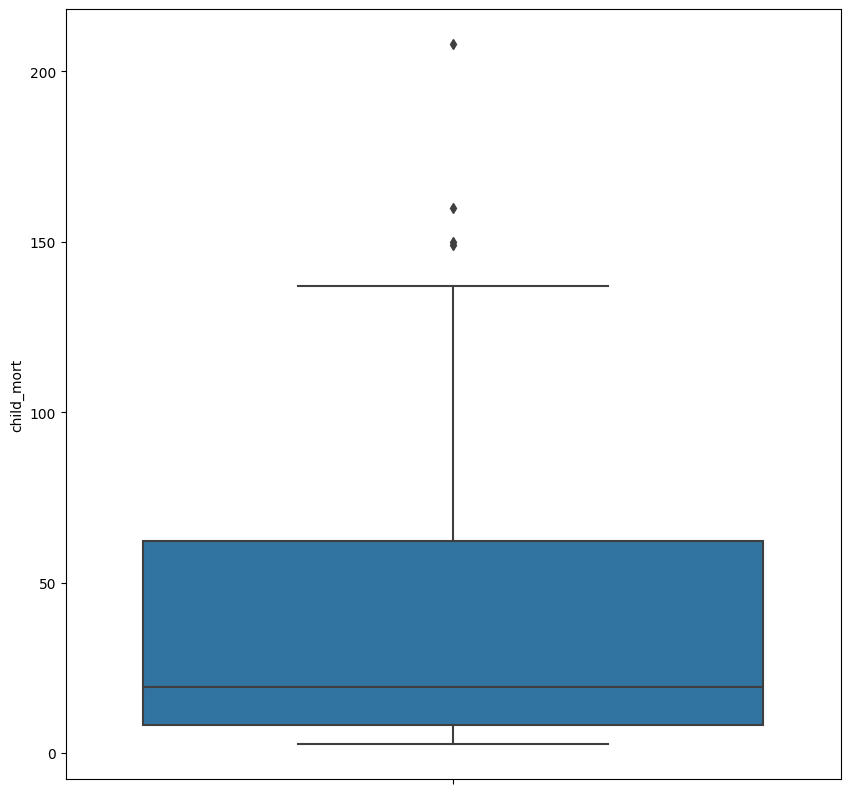

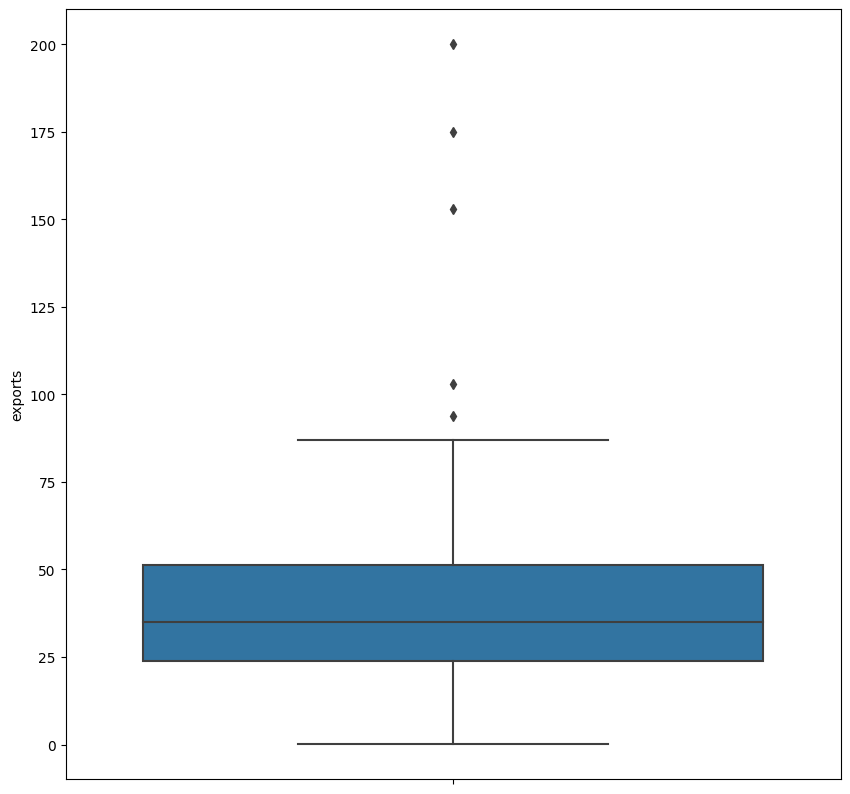

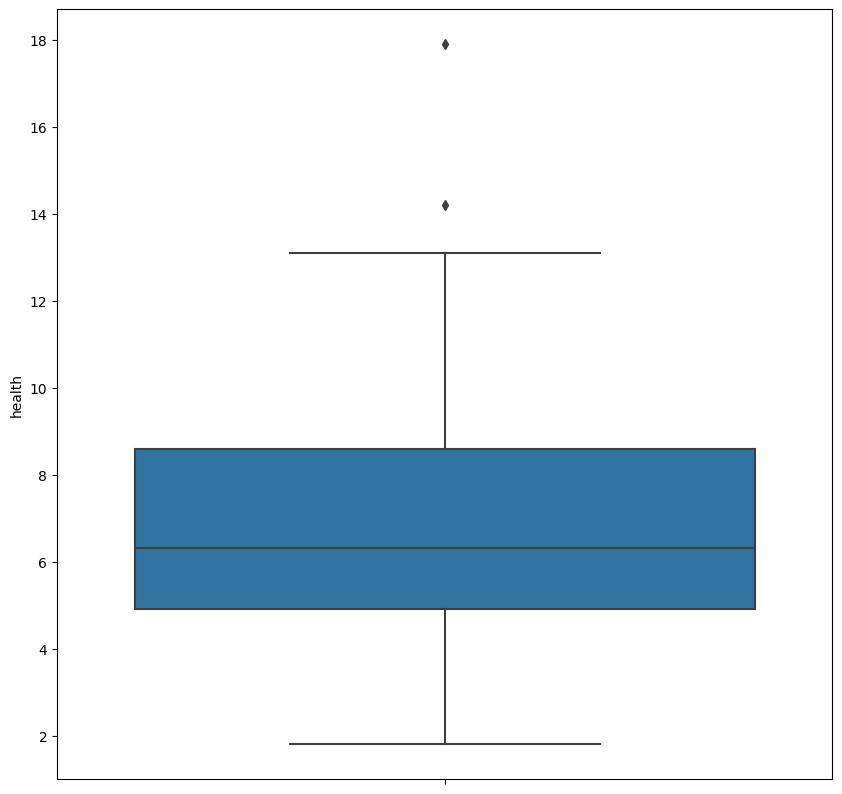

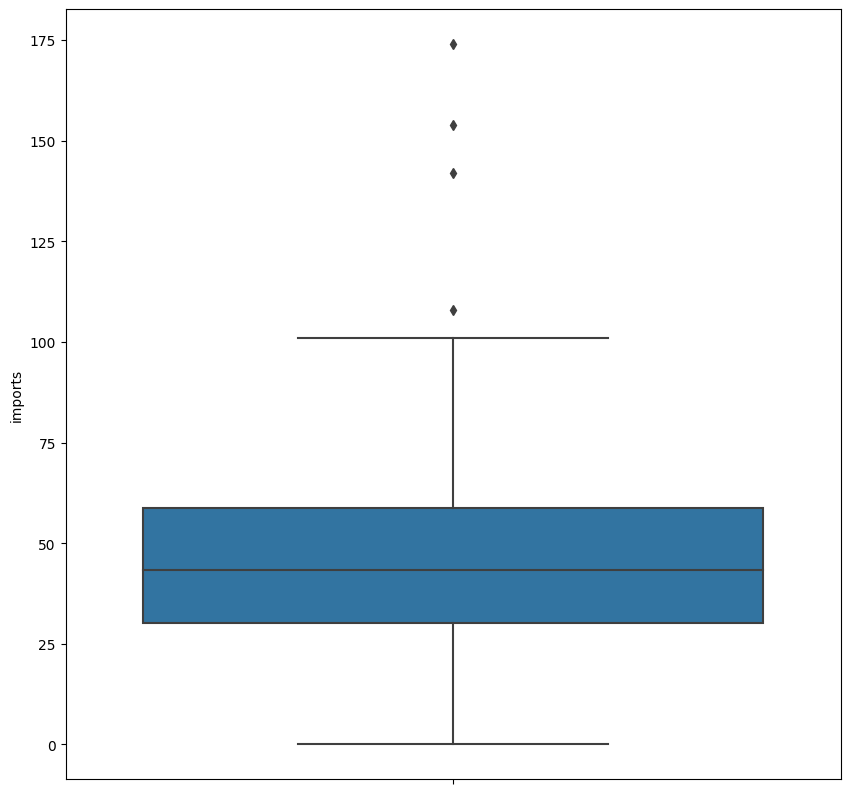

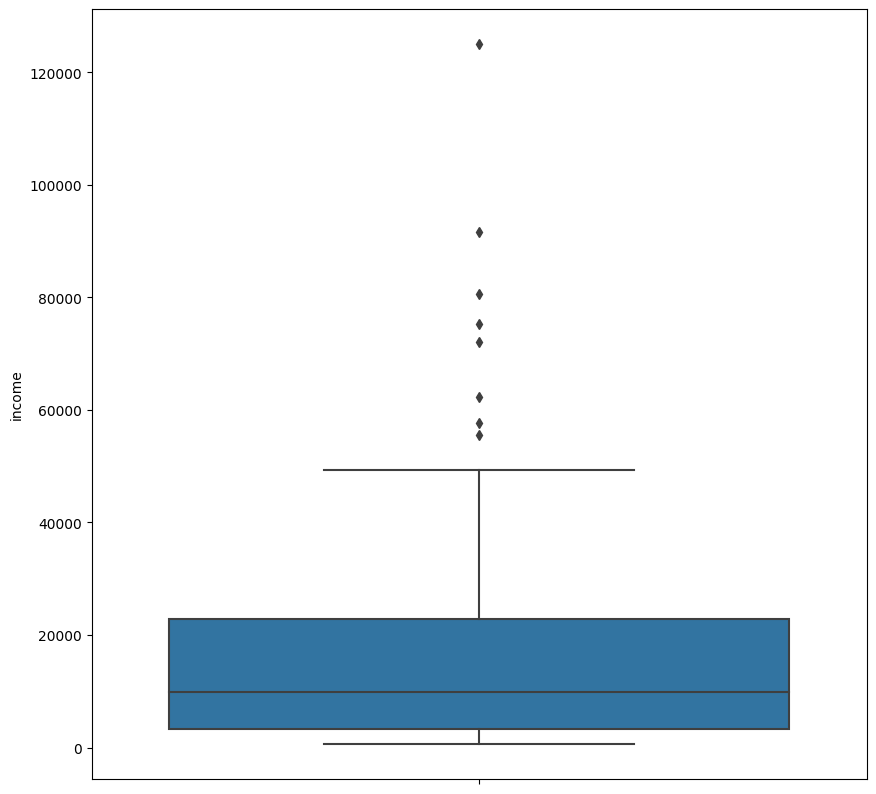

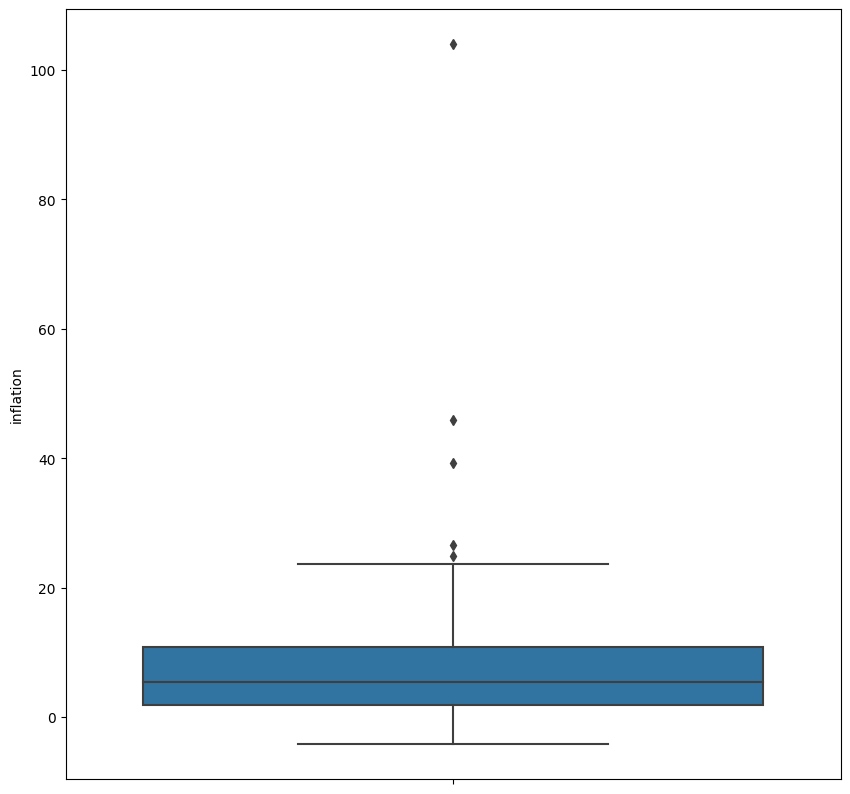

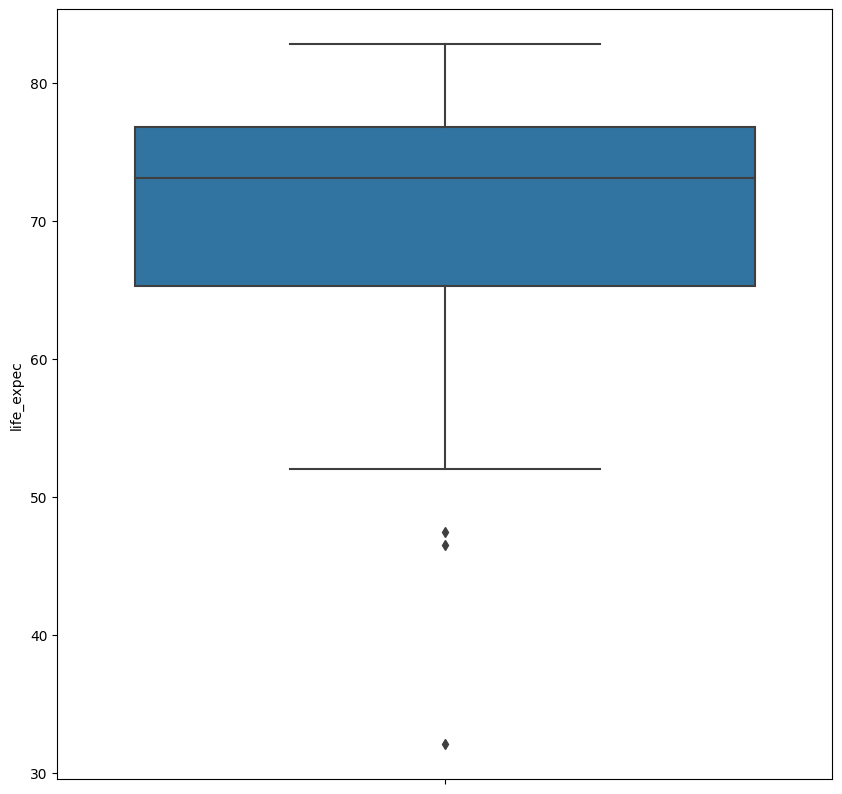

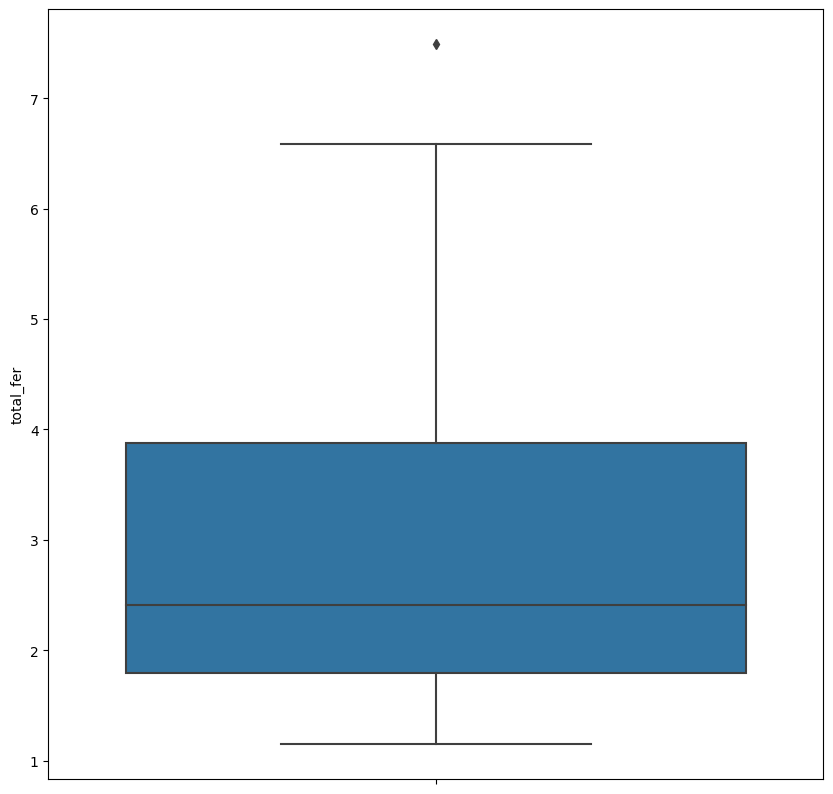

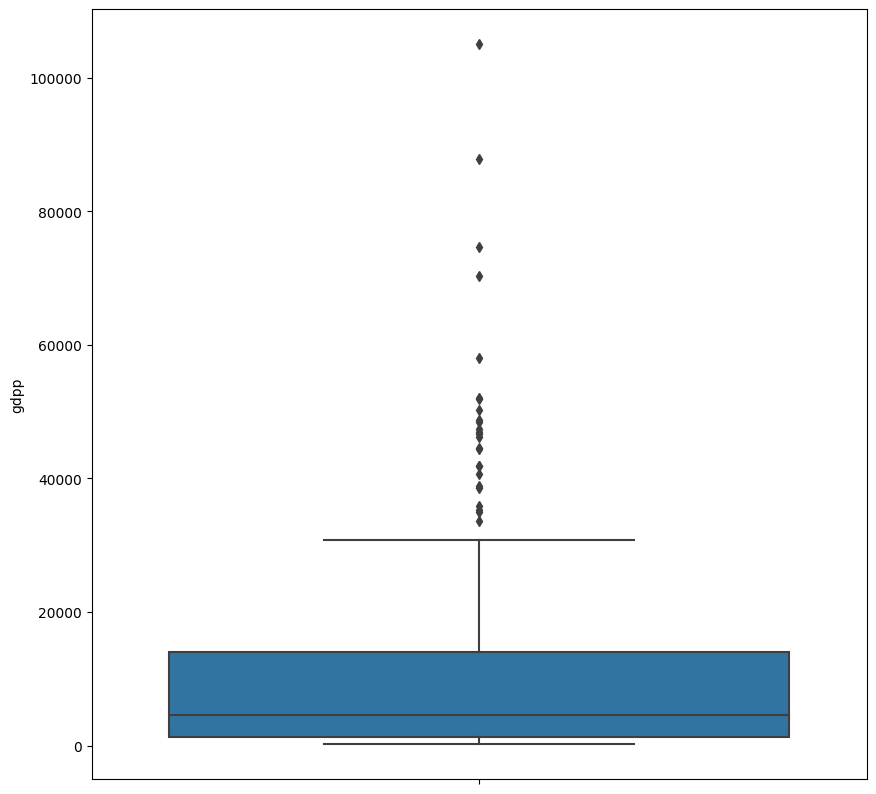

In [5]:
int_cols = df.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df, y=_);

> Podemos observar la existencia de outliers en la variable `GDP per capita` e `inflation`

In [10]:
# Buscamos los valores máximos de inflation y gdpp
print(f'''
    El país con mayor inflación es: {df.iloc[df.inflation.idxmax(), 0]}
         El país con mayor gdpp es: {df.iloc[df.gdpp.idxmax(), 0]}
         ''')


    El país con mayor inflación es: Nigeria
         El país con mayor gdpp es: Luxembourg


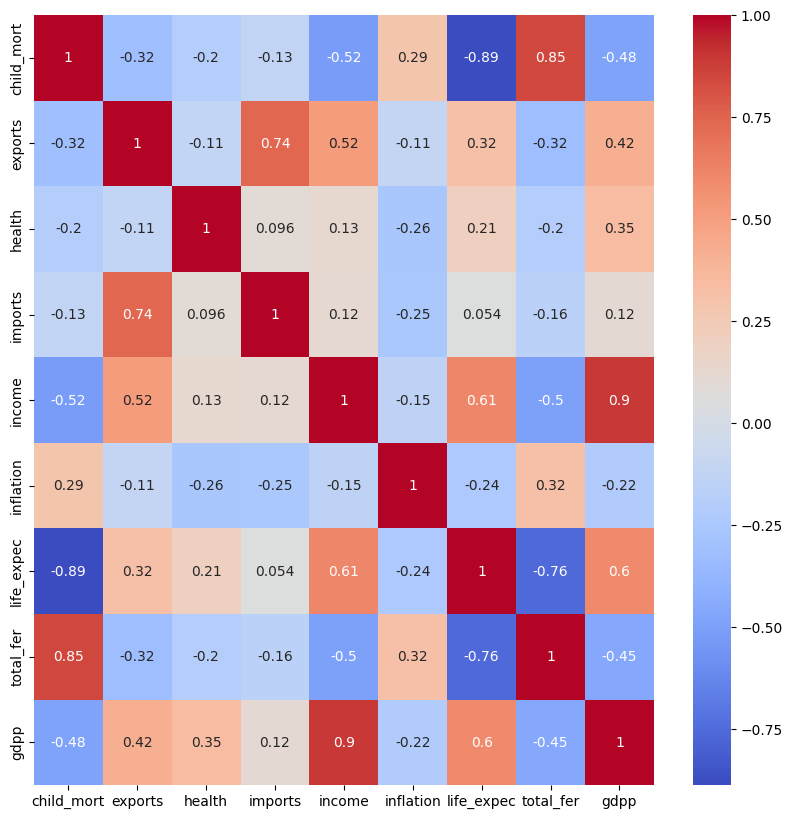

In [12]:
# Creamos una matriz de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

## Escalamiento de datos

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('country', axis=1))

df_scaled = pd.DataFrame(df_scaled, columns = df.drop('country',axis=1).columns )

In [15]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# Aplicando PCA para clustering

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [17]:
# obtenemos la varianza explicada por cada componente
var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


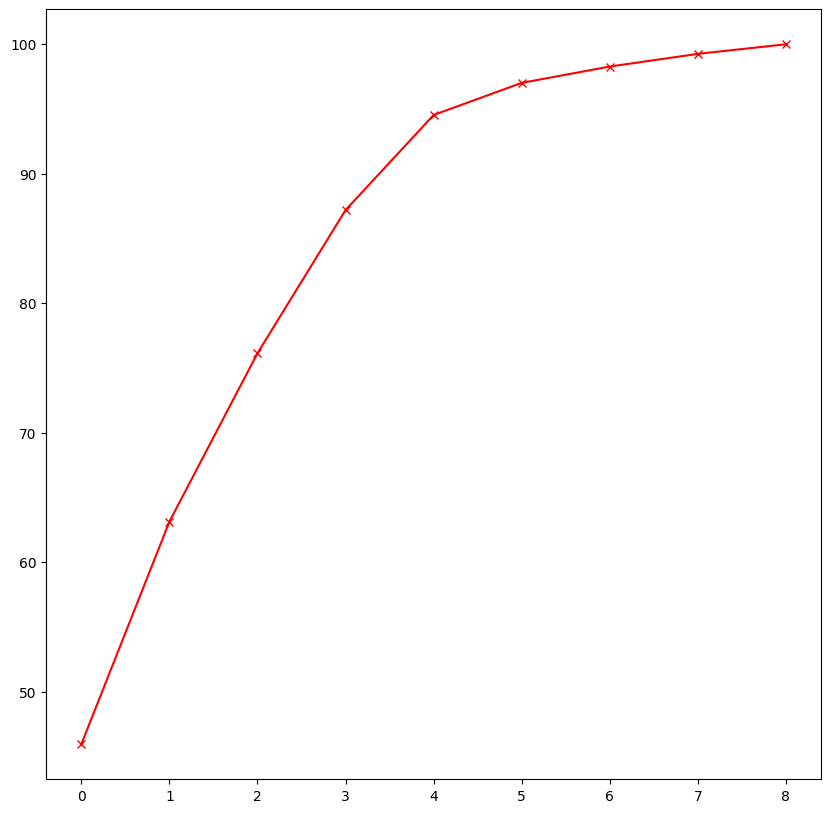

In [18]:
# obtenemos la varianza acumulada
var_cum = np.cumsum(np.round(var_exp, decimals=4)*100)

# graficamos la varianza acumulada
plt.figure(figsize=(10, 10))
plt.plot(var_cum, 'r-x');

In [19]:
pca_data_standard = pd.DataFrame(pca_data_scaled) # creamos un dataframe con los datos de pca
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True) # eliminamos las columnas que no aportan información
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


# Resolviendo con K-means

In [22]:
# Importamos las librerías necesarias para el clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from warnings import filterwarnings
filterwarnings('ignore')

## PCA

In [23]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    km = KMeans(n_clusters=_)
    y = km.fit_predict(pca_data_standard)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

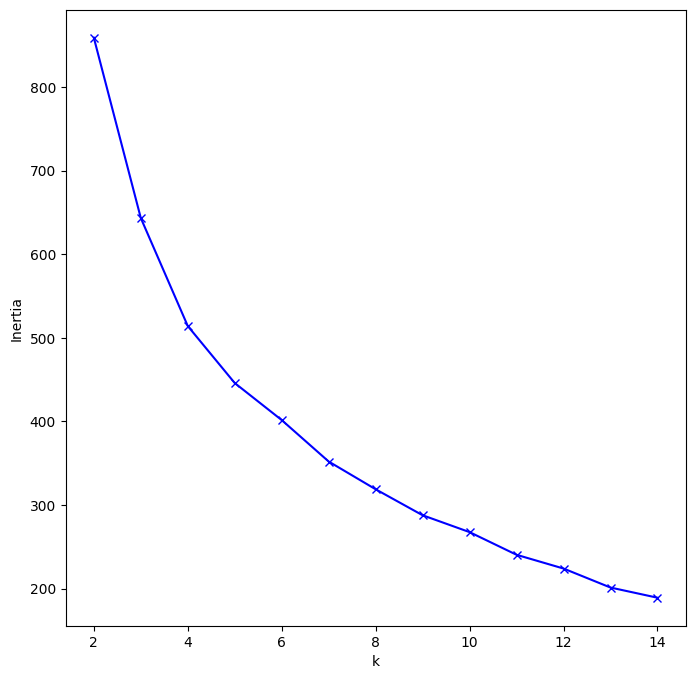

In [24]:
# Graficamos
plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia');

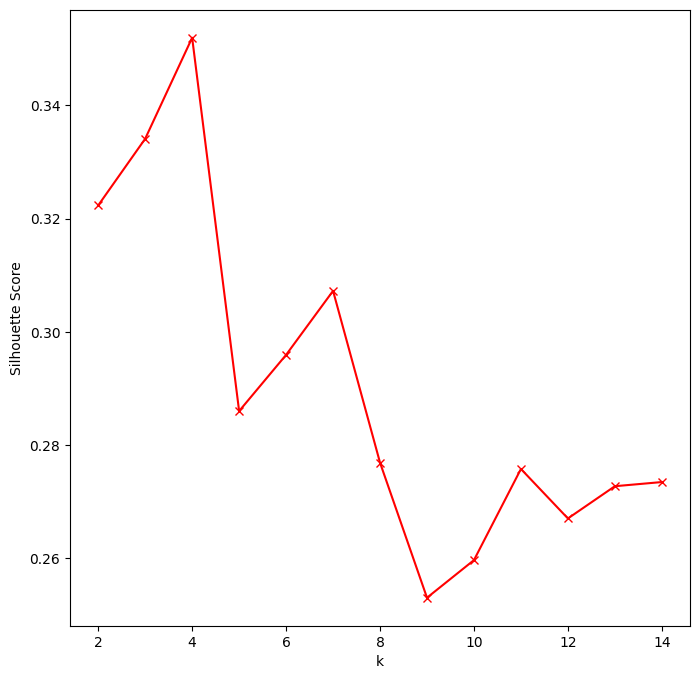

In [25]:
# Graficamos el silhouette score
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

In [26]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df['k_means_pca'] = y

0.35192526767255145


## Sin PCA

In [27]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    km = KMeans(n_clusters=_)
    y = km.fit_predict(df_scaled)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y))

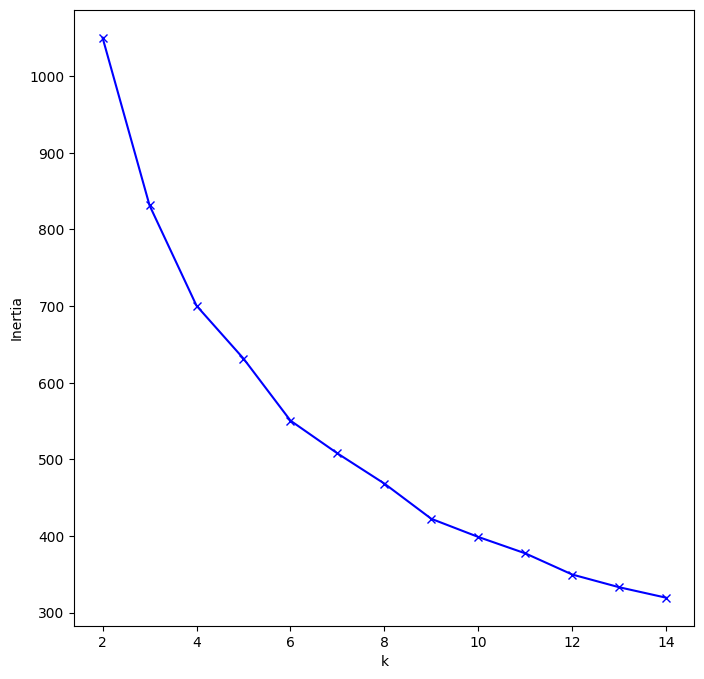

In [28]:
# Graficamos
plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia');

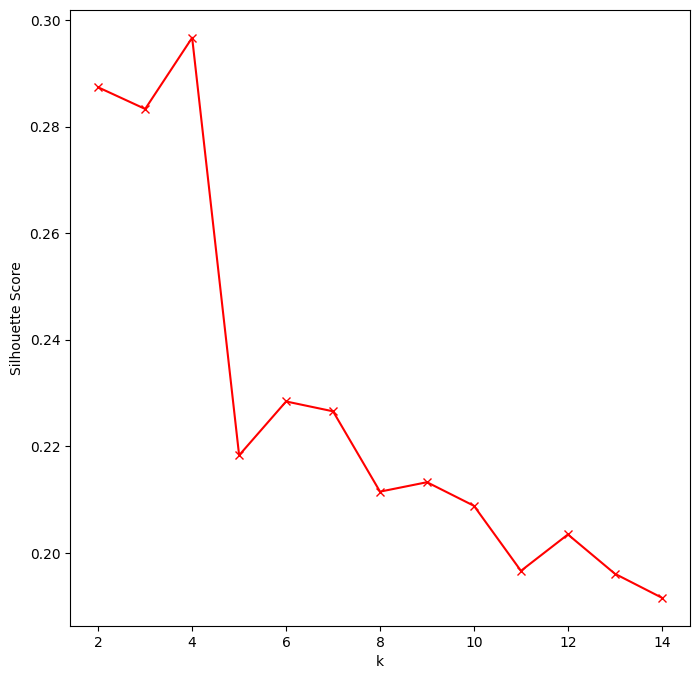

In [29]:
# Graficamos el silhouette score
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

In [30]:
km = KMeans(n_clusters=4)
y = km.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y))
df['k_means'] = y

0.301375962376881


In [39]:
print(f'''
El coeficiente de silueta del modelo KMeans con PCA es: {silhouette_score(pca_data_standard, km.fit_predict(pca_data_standard))}
El coeficiente de silueta del modelo KMeans sin PCA es: {silhouette_score(df_scaled, y)}''')


El coeficiente de silueta del modelo KMeans con PCA es: 0.35192526767255145
El coeficiente de silueta del modelo KMeans sin PCA es: 0.301375962376881


# Resolviendo con hierarchical clustering

## PCA

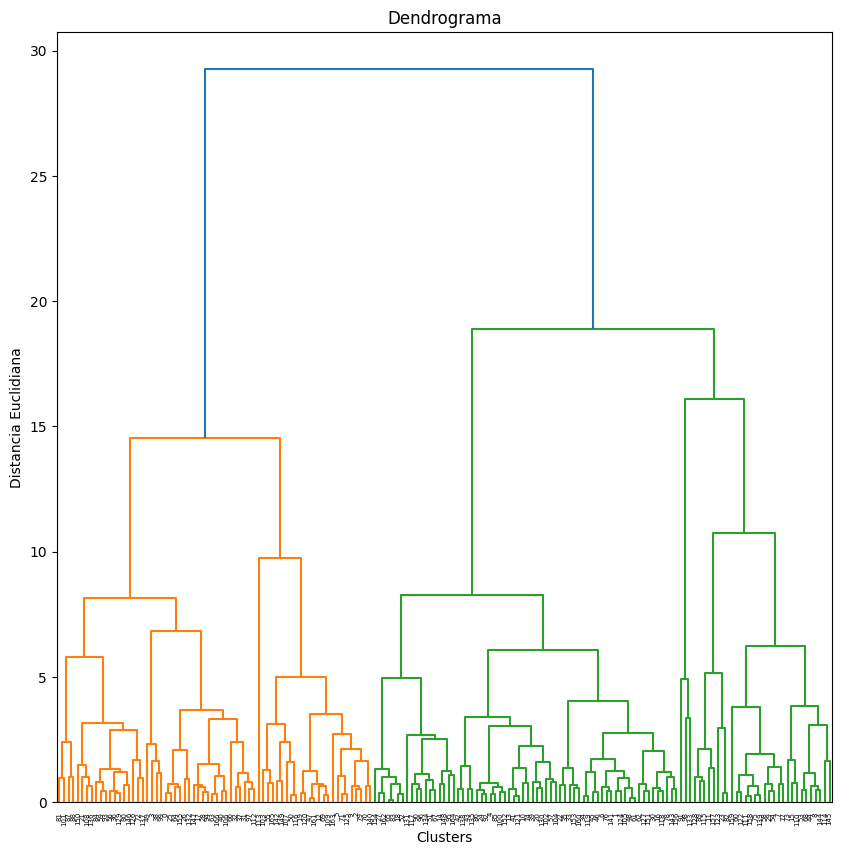

In [32]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Distancia Euclidiana');

In [33]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df['hc_pca'] = y_hc

0.3070110704080526


## Sin PCA

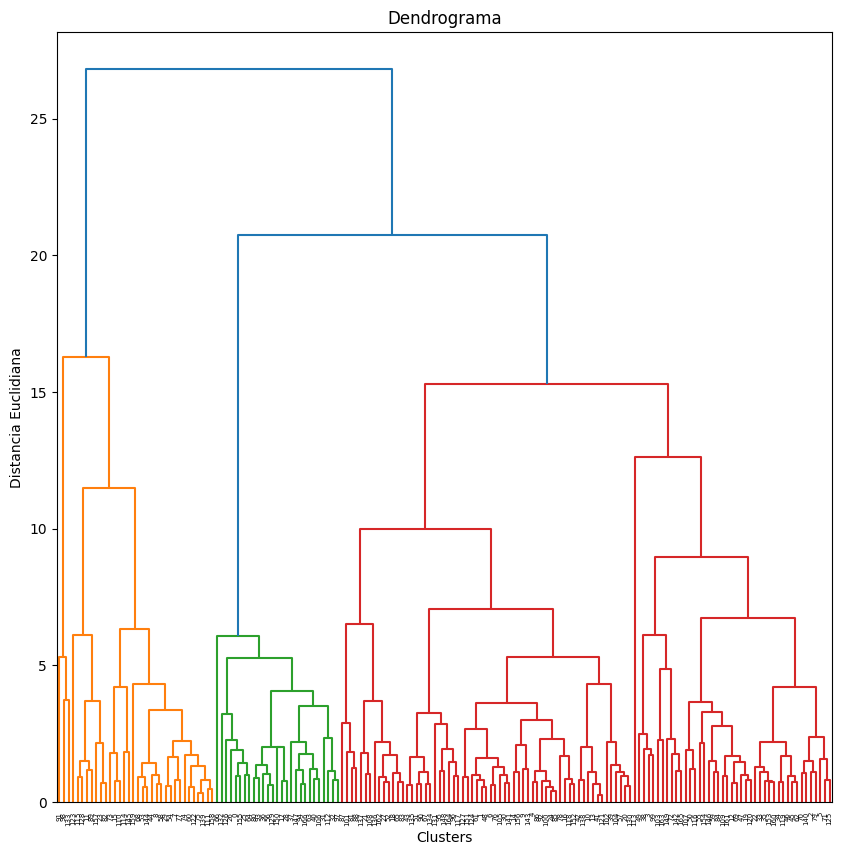

In [34]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Distancia Euclidiana');

In [35]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_hc))
df['hc'] = y_hc

0.3153134331018189


In [37]:
print(f'''
El coeficiente de silueta del modelo Hierarchical Clustering con PCA es: {silhouette_score(pca_data_standard, hc.fit_predict(pca_data_standard))}
El coeficiente de silueta del modelo Hierarchical Clustering sin PCA es: {silhouette_score(df_scaled, y_hc)}''')


El coeficiente de silueta del modelo Hierarchical Clustering con PCA es: 0.3070110704080526
El coeficiente de silueta del modelo Hierarchical Clustering sin PCA es: 0.3153134331018189


# Resolviendo con DBSCAN

## PCA

In [40]:
# Calamos las distancias entre los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_data_standard)
distances, indices = nbrs.kneighbors(pca_data_standard)

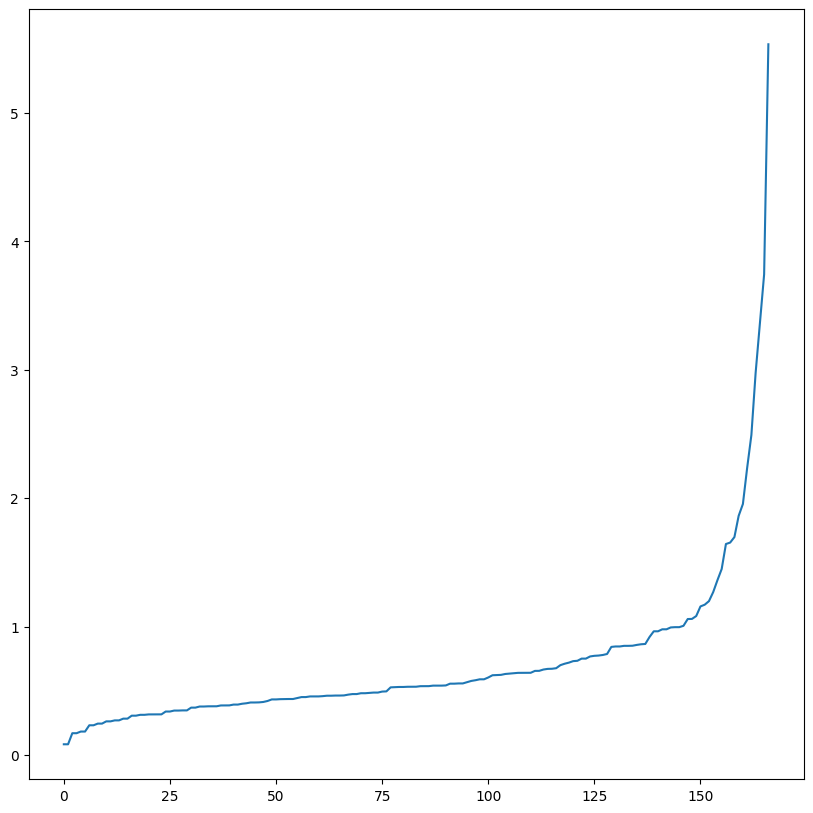

In [41]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 10))
plt.plot(distances);

In [50]:
eps_values = np.arange(0.5, 2.0, 0.10) # valores de eps
min_samples = np.arange(3, 12) # valores de min_samples

from itertools import product
dbscan_params = list(product(eps_values, min_samples)) # creamos una lista con los parámetros

no_of_clusters = []
sil_score = []
for p in dbscan_params: # iteramos sobre los parámetros
    y = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard) # entrenamos el modelo
    try:
        sil_score.append(silhouette_score(pca_data_standard, y)) # obtenemos el coeficiente de silueta
    except:
        sil_score.append(0) # si no se puede obtener el coeficiente de silueta, se asigna 0
    no_of_clusters.append(len(np.unique(y))) # obtenemos el número de clusters

In [51]:
# creamos un dataframe con los resultados
df_param_tuning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tuning['Silhouette_score'] = sil_score
df_param_tuning['N_clusters'] = no_of_clusters

In [52]:
pivot_1 = pd.pivot_table(df_param_tuning, values='Silhouette_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tuning, values='N_clusters', columns='Eps', index='Min_samples')

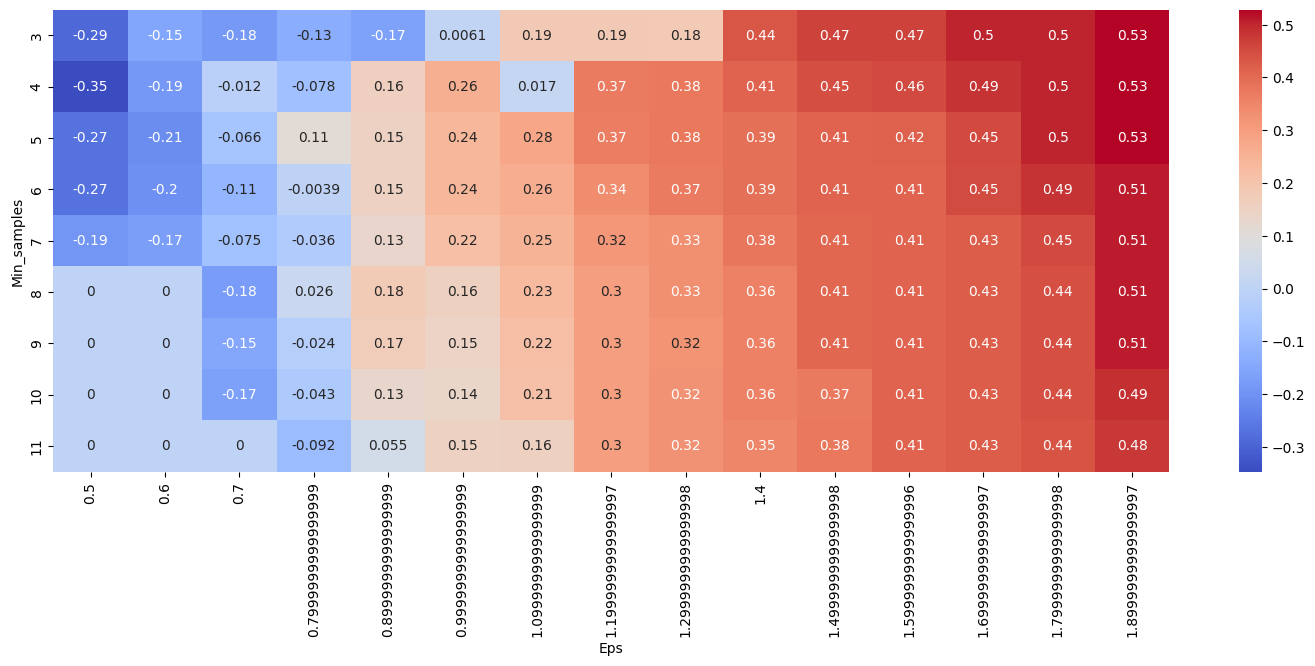

In [53]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, ax=ax, cmap='coolwarm');

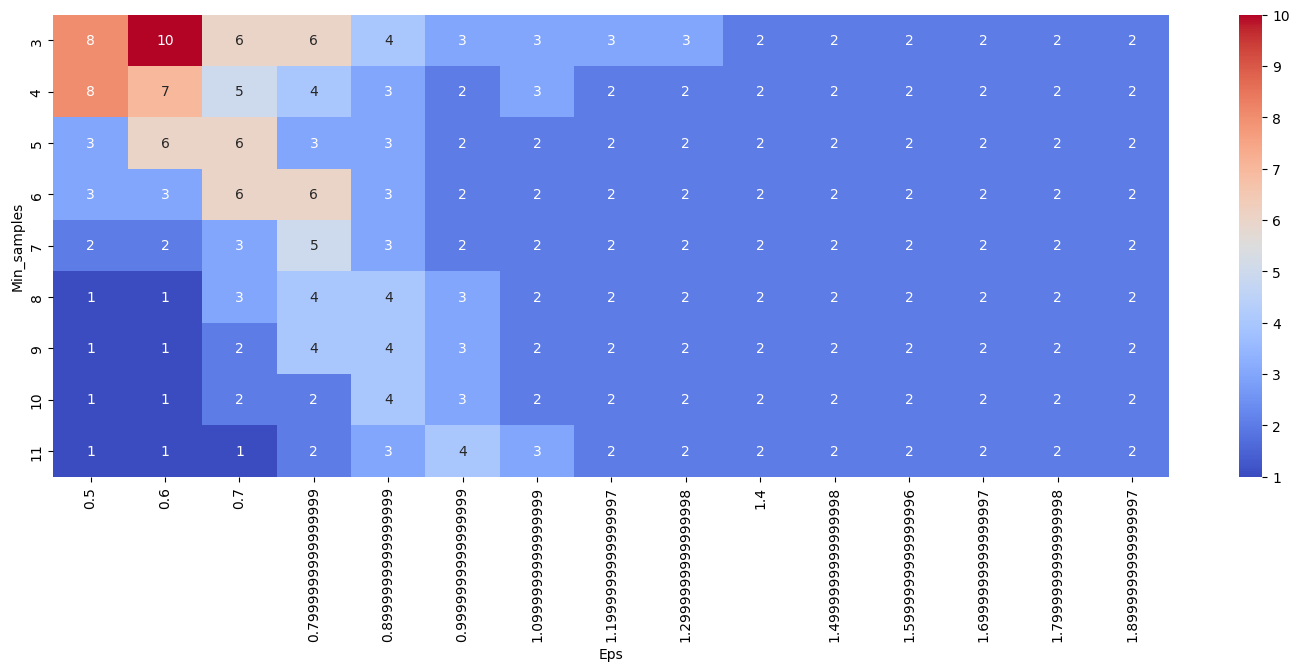

In [54]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, ax=ax, cmap='coolwarm');

In [56]:
dbscan_train = DBSCAN(eps=1.1, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df['dbscan_pca'] = y_dbscan

0.18618912442869506


## Sin PCA

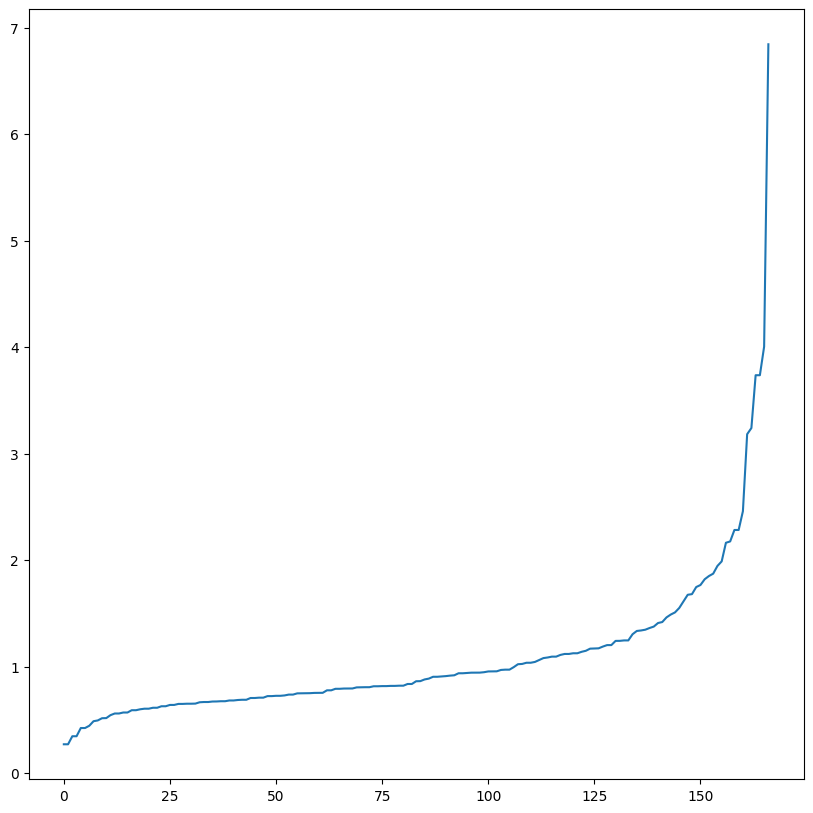

In [57]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 10))
plt.plot(distances);

In [58]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_scaled)
    try:
        sil_score.append(silhouette_score(df_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [59]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [60]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

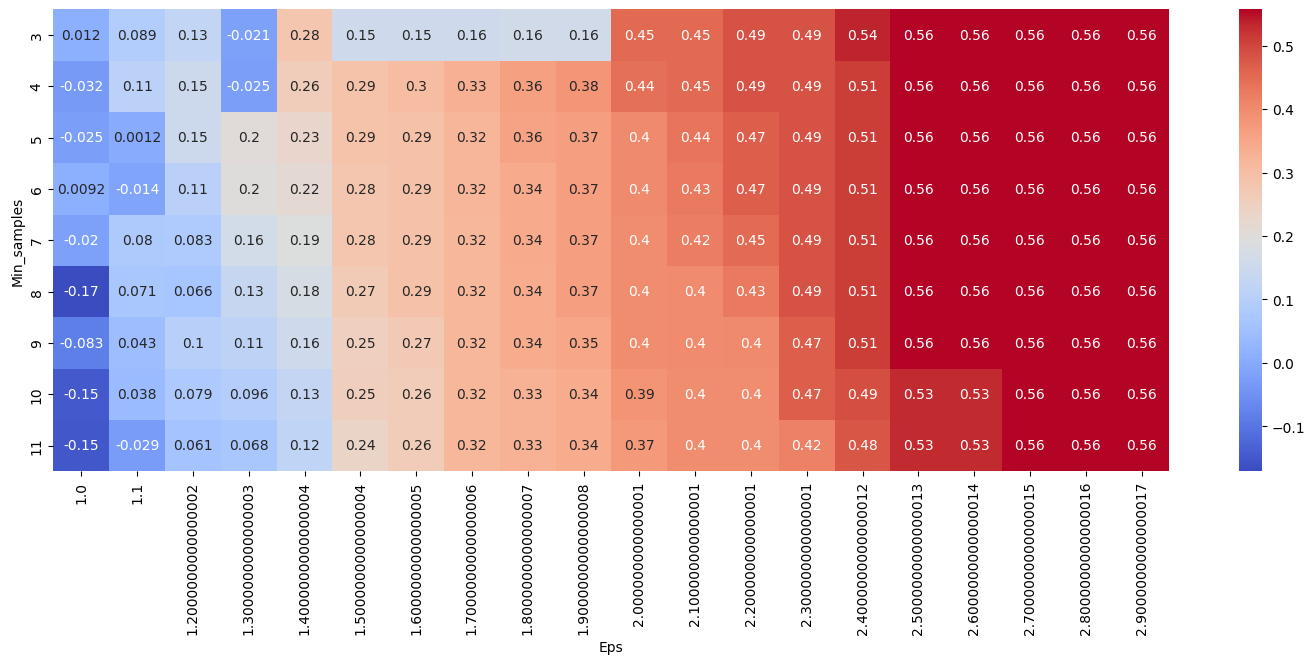

In [61]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, ax=ax, cmap='coolwarm');

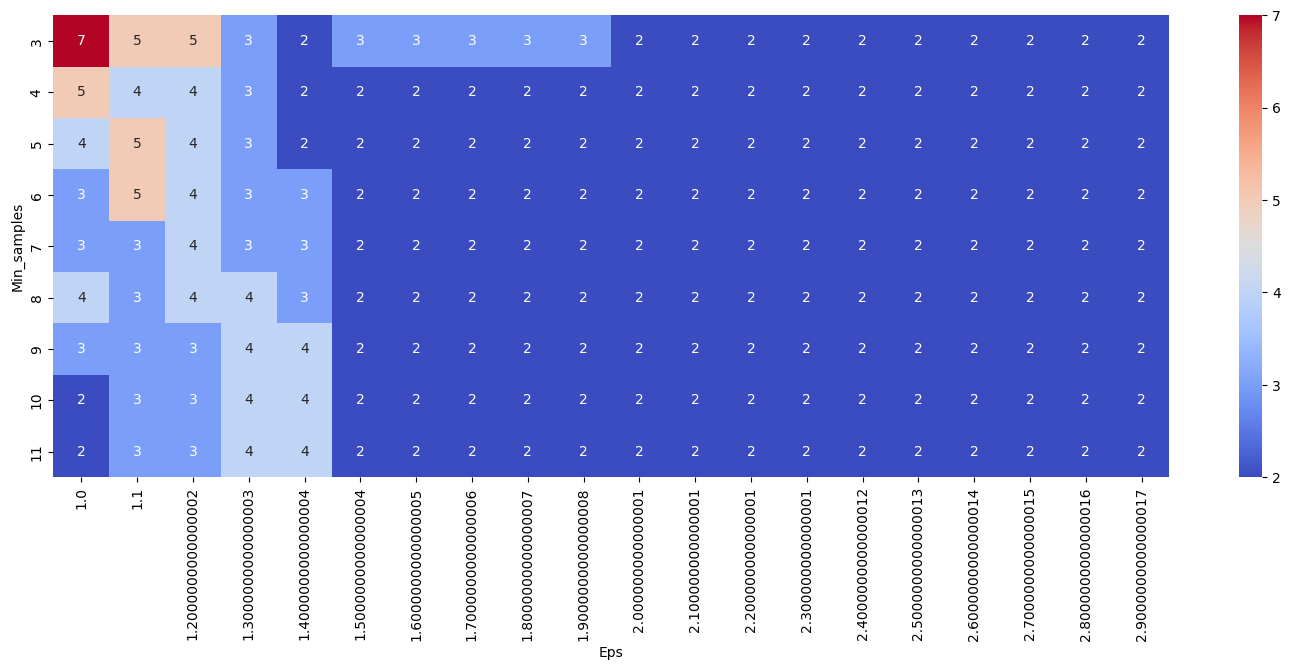

In [62]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, ax=ax, cmap='coolwarm');

In [63]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_scaled)
print(silhouette_score(df_scaled,y_dbscan ))
df['dbscan_cluster'] = y_dbscan

0.1563549566374231


# Evaluación resultados de distintos modelos de clustering

In [64]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,3,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,3,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,3,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,3,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,3,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,1,0,0,0


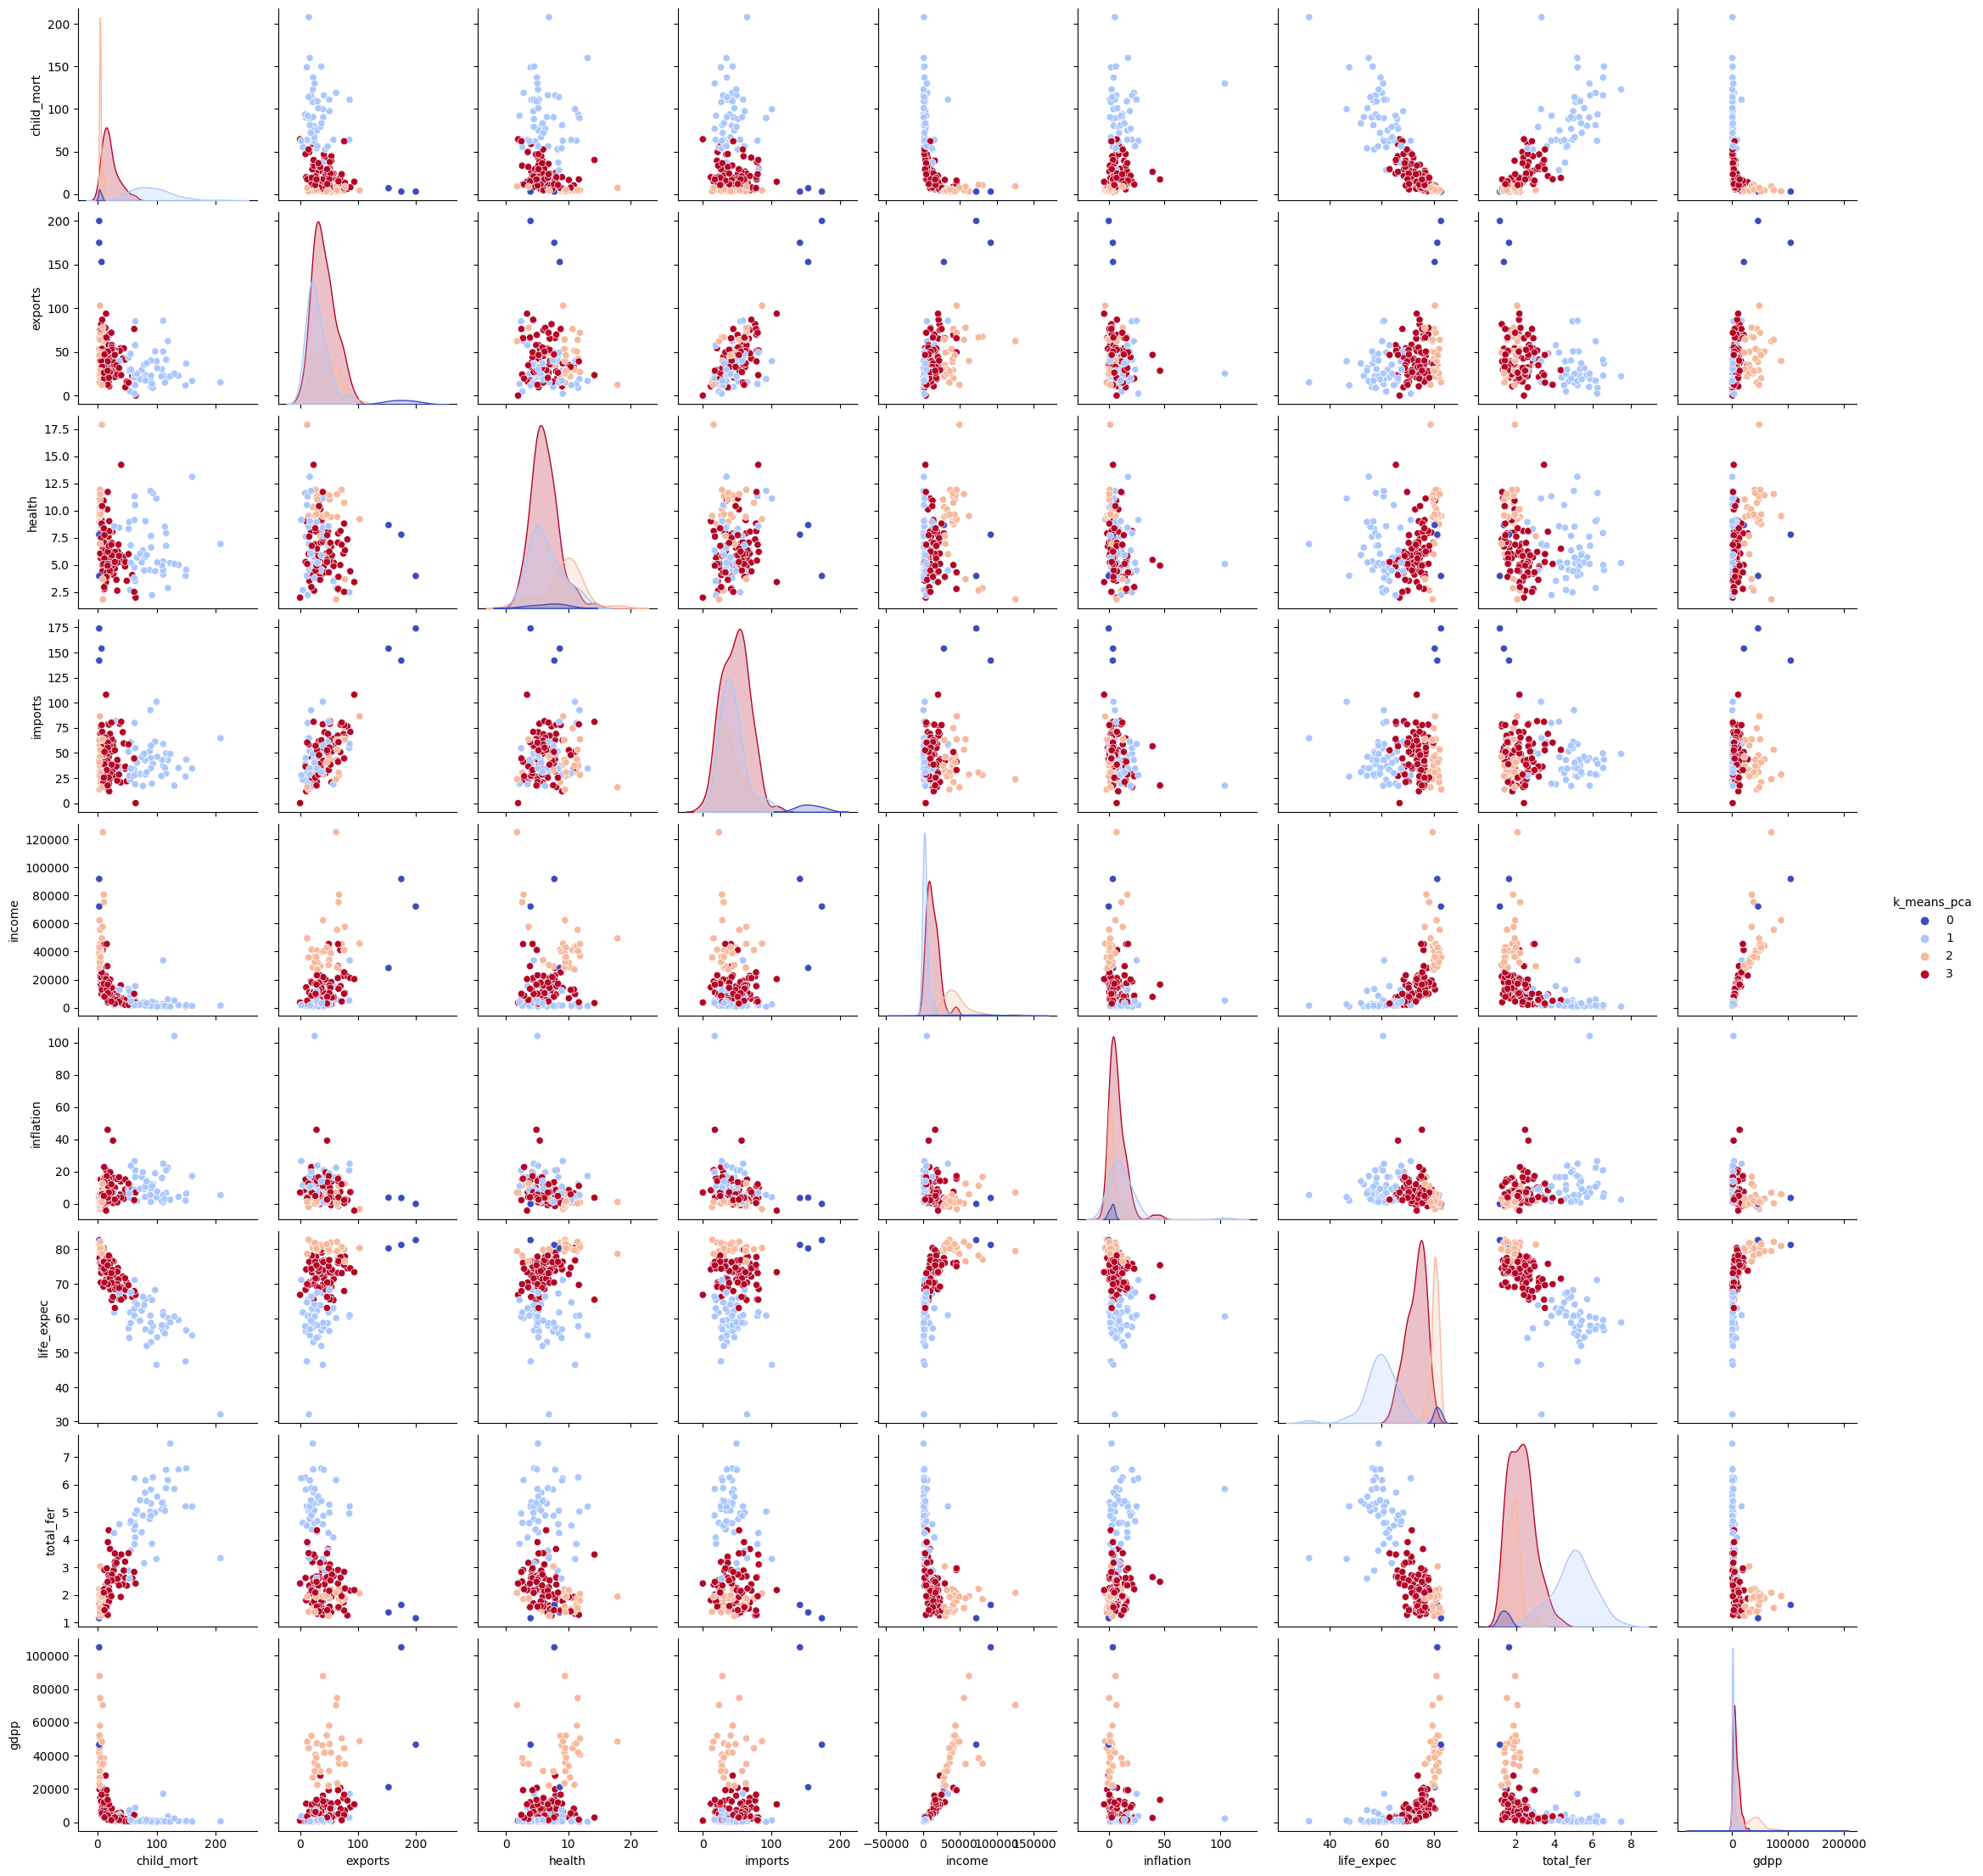

In [65]:
# Pairplot para kmeans con PCA
sns.pairplot(data = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm');

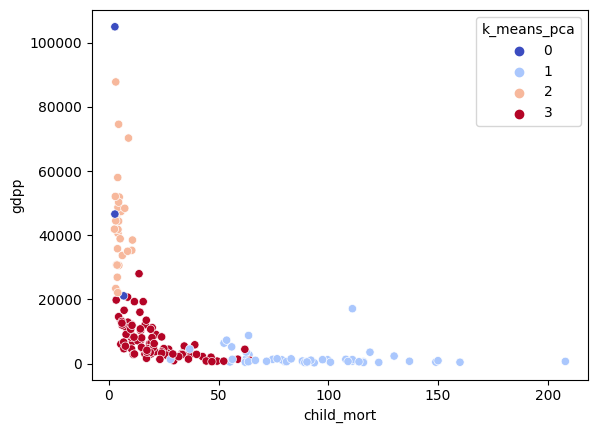

In [66]:
# Analizamos el scatterplot de  child_mort vs gdpp
sns.scatterplot(x='child_mort', y='gdpp', data=df, hue='k_means_pca', palette='coolwarm');

In [67]:
# Analizamos los países que pertenecen a cada cluster
df[df['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,3,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,3,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,3,0,0,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3,3,1,0,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,3,3,0,0,0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,3,3,1,0,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,3,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,3,1,0,-1,-1
